<a href="https://colab.research.google.com/github/my-quach/AI-CHALLENGE-3I/blob/main/HETHONGTINHTIENDOAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

✨ Welcome to F5 – Refreshing Ideas, Delicious Tech! 🚀
🔓 Secret Unlocked: MEAL at UEH Canteen 🍱🎉


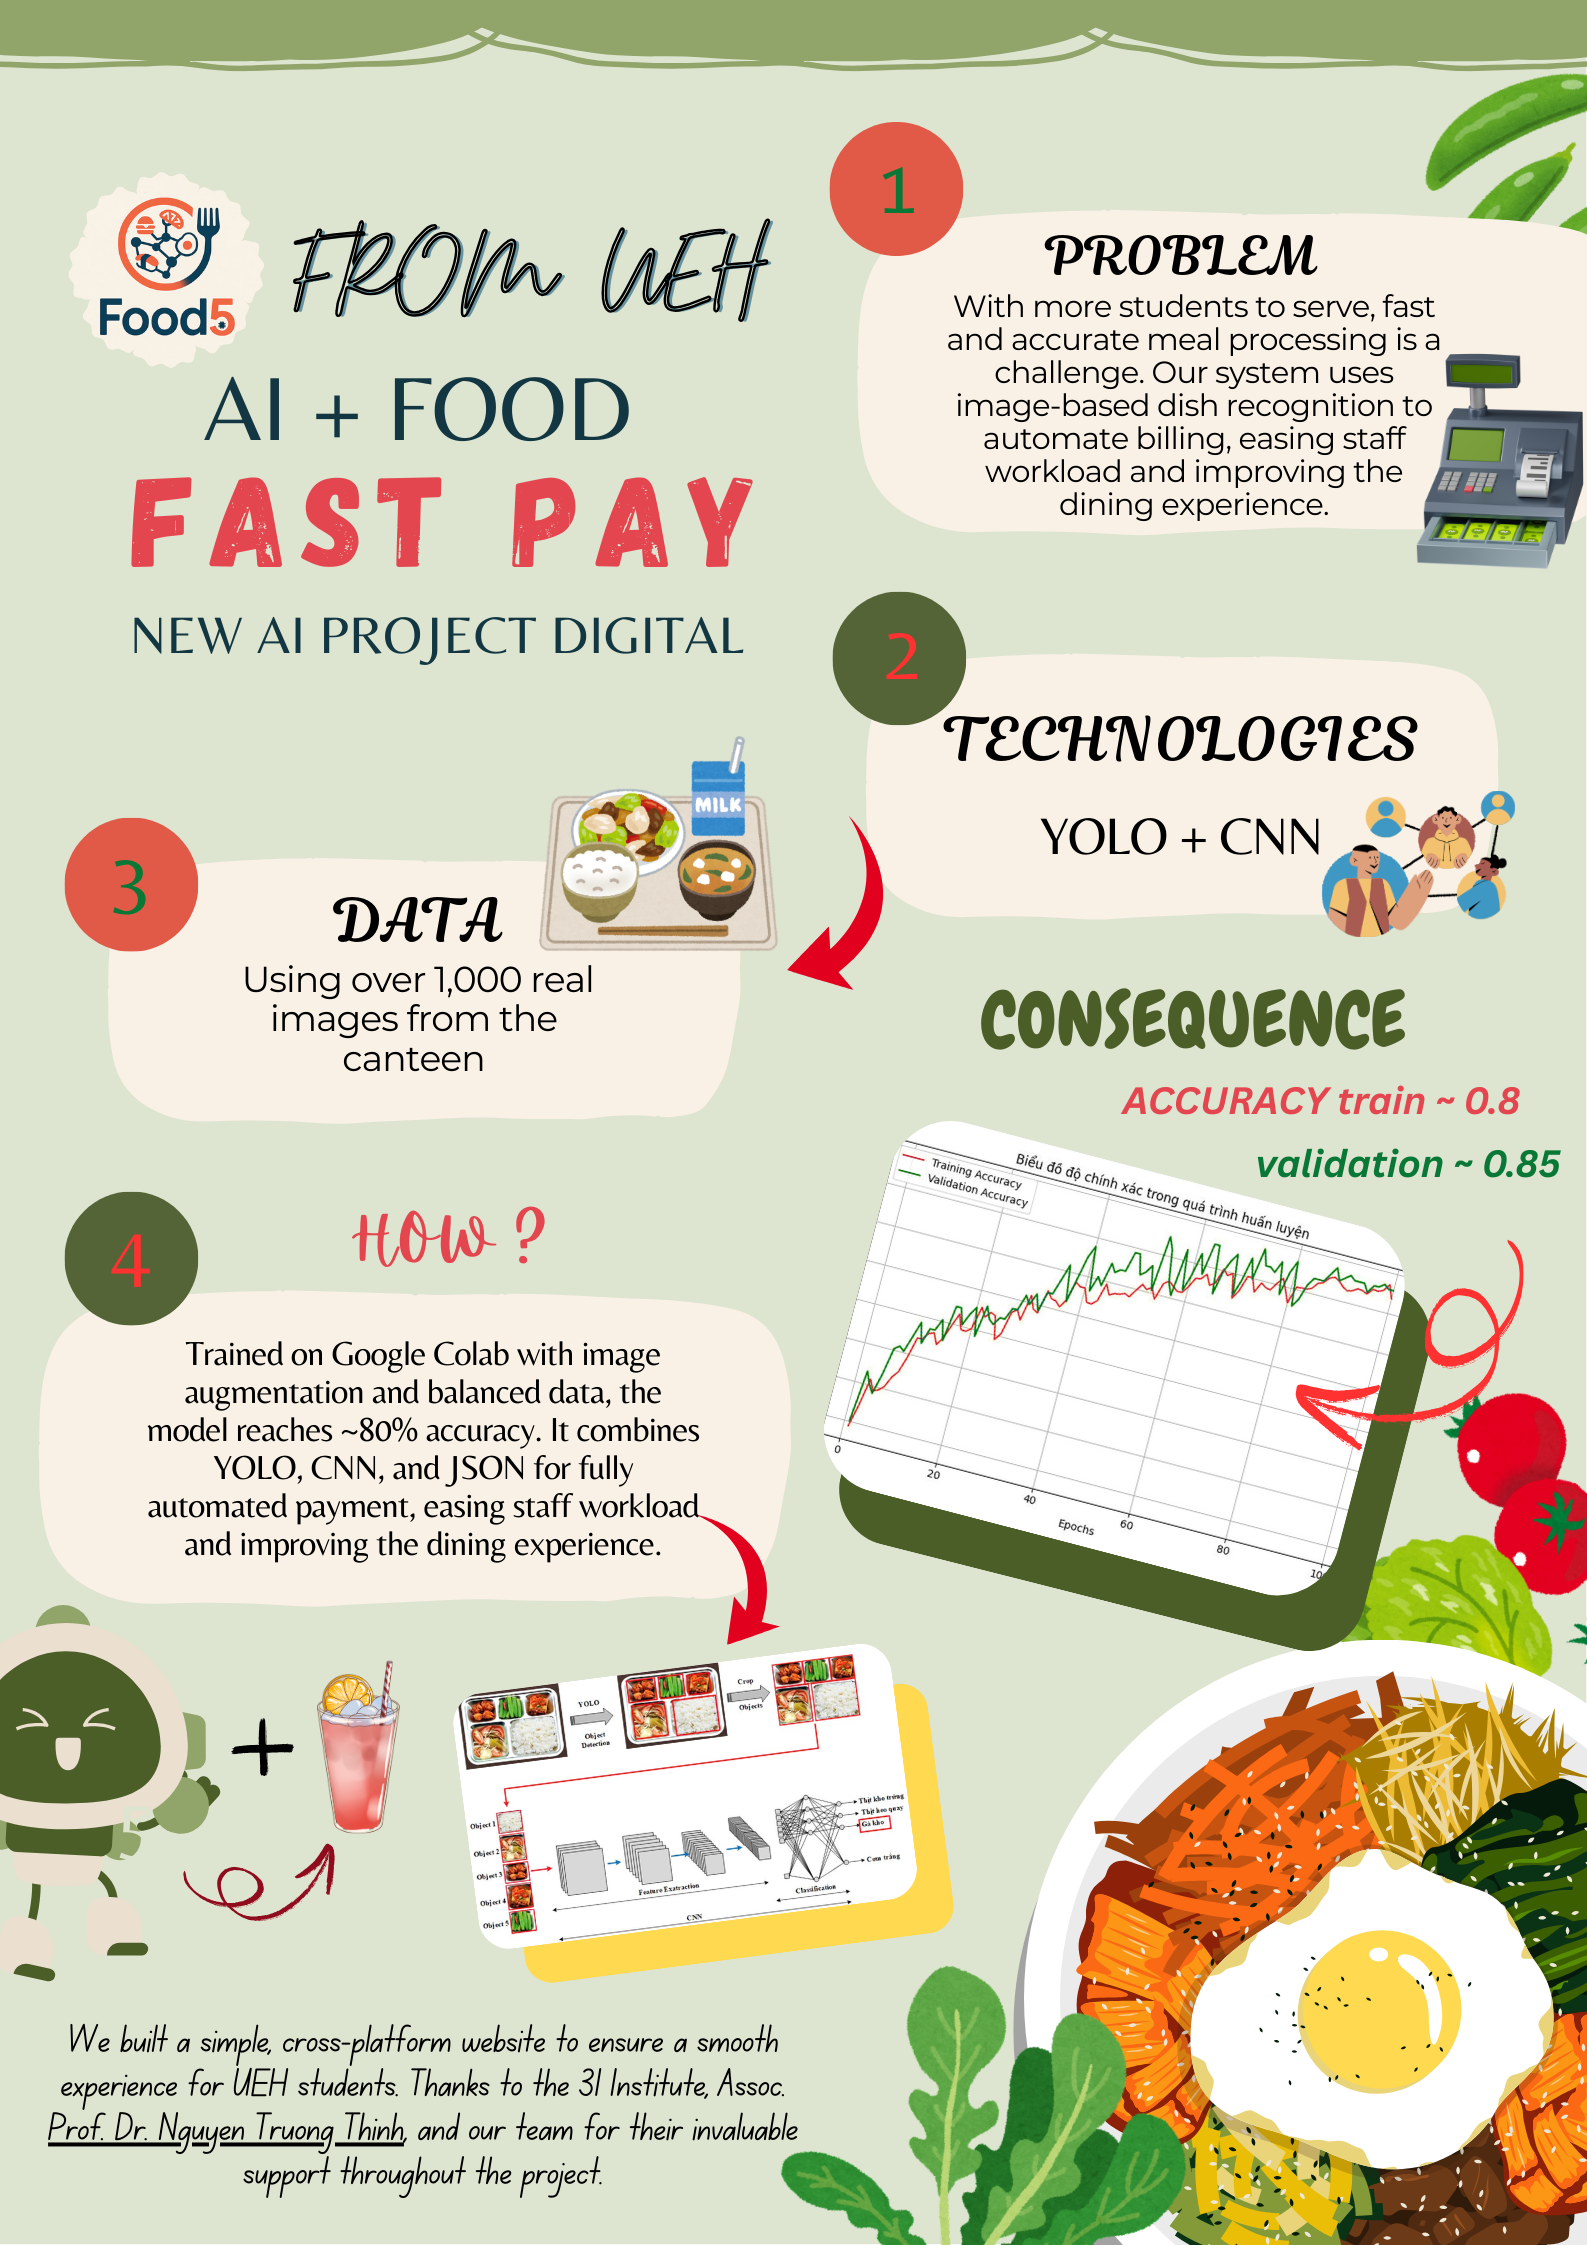

In [ ]:
from IPython.display import Image, display

print("✨ Welcome to F5 – Refreshing Ideas, Delicious Tech! 🚀")
print("🔓 Secret Unlocked: MEAL at UEH Canteen 🍱🎉")

poster_path = "/content/drive/MyDrive/F5 .png"
display(Image(poster_path))

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 15.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 90.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 82.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 48.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 81.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling 


image 1/1 /content/drive/MyDrive/Money/test/22.jpg: 384x640 5 bowls, 1 sandwich, 1 dining table, 283.2ms
Speed: 11.9ms preprocess, 283.2ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict2


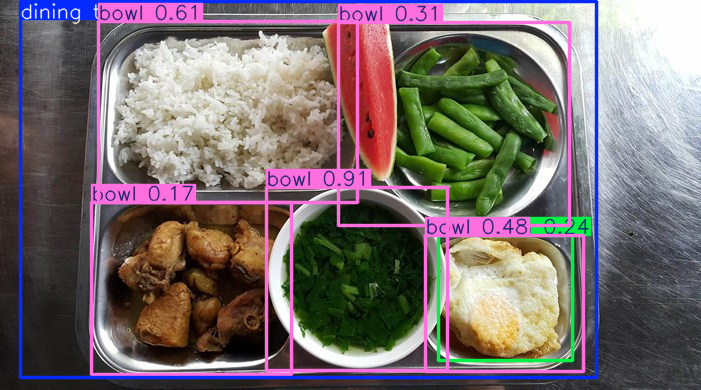

In [ ]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
model = YOLO('yolov10n.pt')

results = model(source='/content/drive/MyDrive/Money/test/22.jpg', save=True, save_crop=True, imgsz=640, conf=0.15)
img = cv2.imread('/content/drive/MyDrive/Money/test/22.jpg')
results[0].show()


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.optimizers import Adam

train_folder = '/content/drive/MyDrive/pj ai/train'
val_folder = '/content/drive/MyDrive/pj ai/val'

# Data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    brightness_range=(0.8, 1.2),
    fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_folder,
    target_size=(200, 200),
    batch_size=32,
    class_mode='categorical',
    shuffle=True)

validation_generator = val_datagen.flow_from_directory(
    val_folder,
    target_size=(200, 200),
    batch_size=32,
    class_mode='categorical',
    shuffle=False)
print(train_generator.class_indices)
print(validation_generator.class_indices)

model = Sequential([
    Input(shape=(200,200,3)),
    Conv2D(32, (3,3), activation='relu', padding='same'),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu', padding='same'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu', padding='same'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(train_generator.num_classes, activation='softmax')])

model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=12, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-5, verbose=1)
checkpoint = ModelCheckpoint('/content/drive/MyDrive/pj ai.keras', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)


Found 599 images belonging to 10 classes.
Found 99 images belonging to 10 classes.
{'canh cải': 0, 'canh chua': 1, 'cá hú kho': 2, 'cơm': 3, 'gà chiên': 4, 'rau muống xào': 5, 'thịt kho': 6, 'thịt kho trứng': 7, 'trứng chiên': 8, 'đậu hủ sốt cà chua': 9}
{'canh cải': 0, 'canh chua': 1, 'cá hú kho': 2, 'cơm': 3, 'gà chiên': 4, 'rau muống xào': 5, 'thịt kho': 6, 'thịt kho trứng': 7, 'trứng chiên': 8, 'đậu hủ sốt cà chua': 9}


In [ ]:
history = model.fit(
    train_generator,
    epochs=100,
    validation_data=validation_generator,
    callbacks=[early_stop, reduce_lr])

Epoch 1/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 77s 4s/step - accuracy: 0.1565 - loss: 2.9473 - val_accuracy: 0.2525 - val_loss: 2.1147 - learning_rate: 0.0010
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 86s 4s/step - accuracy: 0.2437 - loss: 2.0305 - val_accuracy: 0.2929 - val_loss: 1.8258 - learning_rate: 0.0010
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 76s 4s/step - accuracy: 0.2952 - loss: 1.9321 - val_accuracy: 0.3131 - val_loss: 1.7688 - learning_rate: 0.0010
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 72s 4s/step - accuracy: 0.2854 - loss: 1.8300 - val_accuracy: 0.3939 - val_loss: 1.6573 - learning_rate: 0.0010
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 72s 4s/step - accuracy: 0.2989 - loss: 1.7545 - val_accuracy: 0.3131 - val_loss: 1.6387 - learning_rate: 0.0010
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 72s 4s/step - accuracy: 0.3551 - loss: 1.7462 - val_accuracy: 0.3939 - val_loss: 1.4409 - learning_rate: 0.0010
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 72s 4s/step - accuracy: 0.3498 - loss: 1.6290 - val_acc

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.figure(figsize=(8, 5))
plt.plot(epochs, acc, 'b-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'g-', label='Validation Accuracy')
plt.title('Biểu đồ độ chính xác trong quá trình huấn luyện')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

NameError: name 'history' is not defined

In [ ]:
model.save('/content/drive/MyDrive/pj ai.keras')

In [ ]:
import json

menu = {
    'canh cải': 9000,
    'canh chua': 10000,
    'cá hú kho': 22000,
    'cơm': 5000,
    'gà chiên': 25000,
    'rau muống xào': 8000,
    'thịt kho': 17000,
    'thịt kho trứng': 18000,
    'trứng chiên': 12000,
    'đậu hủ sốt cà chua': 16000}

with open('/content/drive/MyDrive/menu.json', 'w', encoding='utf-8') as f:
    json.dump(menu, f, ensure_ascii=False, indent=4)


100%|██████████| 15.9M/15.9M [00:00<00:00, 123MB/s] 



image 1/1 /content/drive/MyDrive/Money/test/22.jpg: 384x640 5 bowls, 1 broccoli, 1 carrot, 355.8ms
Speed: 3.8ms preprocess, 355.8ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict6
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


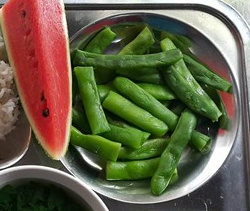

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


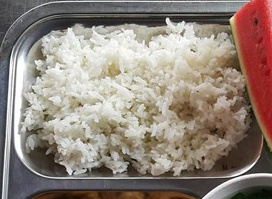

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


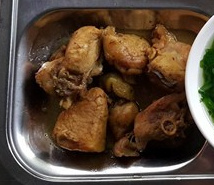

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


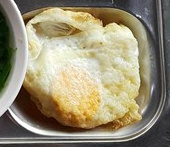

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


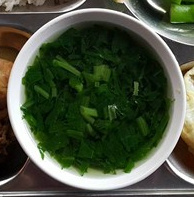

Tổng tiền: 28,000 VND


In [ ]:
import json
import os
import glob
import unicodedata
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
from IPython.display import Image as IPyImage, display, HTML
from ultralytics import YOLO
import cv2


model = YOLO('yolov10s.pt')
results = model(source='/content/drive/MyDrive/Money/test/22.jpg', save=True, save_crop=True, imgsz=640, conf=0.15)

def normalize_text(text):
    return unicodedata.normalize('NFC', text)

# Load model
cnn_model = load_model('/content/drive/MyDrive/Money/cnn_model3.keras')

classes = ['canh cải', 'canh chua', 'cá hú kho', 'cơm', 'gà chiên', 'rau muống xào', 'thịt kho',
           'thịt kho trứng', 'trứng chiên', 'đậu hủ sốt cà chua']

with open('/content/drive/MyDrive/Money/menu.json', 'r', encoding='utf-8') as f:
    menu_raw = json.load(f)

menu = {normalize_text(k): v for k, v in menu_raw.items()}

# Dự đoán tên món ăn
cropped = sorted(glob.glob('/content/runs/detect/predict*/crops'), key=os.path.getmtime, reverse=True)
latest_cropped = cropped[0]
bowl_folder = os.path.join(latest_cropped, 'bowl')
predicted_dishes = []
total = 0

# Lấy ảnh crop trực tiếp trong folder 'bowl'
for img_name in os.listdir(bowl_folder):
    img_path = os.path.join(bowl_folder, img_name)

    # Load ảnh và dự đoán
    img = image.load_img(img_path, target_size=(200, 200))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = cnn_model.predict(img_array)
    class_idx = np.argmax(prediction)
    dish_name = classes[class_idx]
    confidence = np.max(prediction)

    if confidence < 0.4:
        continue

    dish_name_norm = normalize_text(dish_name)

    if dish_name_norm in menu:
        price = menu[dish_name_norm]
        total += price
        predicted_dishes.append(dish_name)

        display(IPyImage(img_path, width=250))
        display(HTML(f"<p><b>{dish_name}</b>: {price:,} VND — ({confidence:.2f})</p>"))
    else:
        print(None)

print(f"Tổng tiền: {total:,} VND")
